In [16]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
dataset_path = 'Faceshape_dataset'
# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path)
print('using dataset folder: ', base_dir)
#list the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print('subdirectories in base_dir: ', subdirs)

using dataset folder:  Faceshape_dataset
subdirectories in base_dir:  ['test', 'train']


In [20]:
#prepare a list to collect file paths and labels
data = []

#iterate over the subdirectories
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f'warning: {split_dir} is not a directory, skipping.')
        continue
    #list class folders within each split directory
    class_folders = [os.path.join(split_dir, folder) for folder in os.listdir(split_dir) if os.path.isdir(os.path.join(split_dir, folder))]
    print(f'found class folders in "{split}":', [os.path.basename(cf) for cf in class_folders])
    
    #iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder) #folder name as label
        #get all images filepath
        img_files = glob.glob(os.path.join(class_folder,'*.*'))
        print(f'found {len(img_files)} files in "{label}" folder under "{split}".')
        for img_path in img_files:
            data.append({'filepath': img_path, 'label': label, 'orginal_split': split})

#create a dataframe from the collected data
df = pd.DataFrame(data)
#check if df contains the label
if 'label' in df.columns and not df.empty:
    print('Total samples in the dataset: ', len(df))
    print('class distribution:')
    print(df['label'].value_counts())
else:
    raise KeyError('the label column is missing from df.')

#split dataset into train 70% test 10% validation 20%
#first split the test set 10%
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42)

#from the remaining 90% allocate 20% for validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222, #~20% of overall data
    stratify=train_val_df['label'],
    random_state=42)

#show the number of samples for each split
print('\ntrain samples: ', len(train_df))
print('\nvalidation samples: ', len(val_df))
print('\ntest samples: ', len(test_df))

#save the splits to csv for processing
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

found class folders in "test": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 200 files in "Heart" folder under "test".
found 200 files in "Oblong" folder under "test".
found 199 files in "Oval" folder under "test".
found 199 files in "Round" folder under "test".
found 200 files in "Square" folder under "test".
found class folders in "train": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 798 files in "Heart" folder under "train".
found 798 files in "Oblong" folder under "train".
found 797 files in "Oval" folder under "train".
found 789 files in "Round" folder under "train".
found 799 files in "Square" folder under "train".
Total samples in the dataset:  4979
class distribution:
label
Square    999
Heart     998
Oblong    998
Oval      996
Round     988
Name: count, dtype: int64

train samples:  3485

validation samples:  996

test samples:  498


In [21]:
train_df

,filepath,label,orginal_split
3461,Faceshape_dataset\train\Round\Round(161).jpg,Round,train
3700,Faceshape_dataset\train\Round\Round(377).jpg,Round,train
4368,Faceshape_dataset\train\Square\Square(268).jpg,Square,train
10,Faceshape_dataset\test\Heart\Heart(107).jpg,Heart,test
2931,Faceshape_dataset\train\Oval\Oval(401).jpg,Oval,train
...,...,...,...
4649,Faceshape_dataset\train\Square\Square(520).jpg,Square,train
4000,Faceshape_dataset\train\Round\Round(647).jpg,Round,train
3260,Faceshape_dataset\train\Oval\Oval(699).jpg,Oval,train
3481,Faceshape_dataset\train\Round\Round(18).jpg,Round,train


In [22]:
val_df

,filepath,label,orginal_split
589,Faceshape_dataset\test\Oval\Oval(90).jpg,Oval,test
1607,Faceshape_dataset\train\Heart\Heart(647).jpg,Heart,train
1452,Faceshape_dataset\train\Heart\Heart(507).jpg,Heart,train
2384,Faceshape_dataset\train\Oblong\Oblong(628).jpg,Oblong,train
854,Faceshape_dataset\test\Square\Square(149).jpg,Square,test
...,...,...,...
1090,Faceshape_dataset\train\Heart\Heart(181).jpg,Heart,train
2781,Faceshape_dataset\train\Oval\Oval(267).jpg,Oval,train
957,Faceshape_dataset\test\Square\Square(62).jpg,Square,test
3274,Faceshape_dataset\train\Oval\Oval(710).jpg,Oval,train


In [23]:
test_df

,filepath,label,orginal_split
847,Faceshape_dataset\test\Square\Square(142).jpg,Square,test
3151,Faceshape_dataset\train\Oval\Oval(60).jpg,Oval,train
3346,Faceshape_dataset\train\Oval\Oval(776).jpg,Oval,train
1353,Faceshape_dataset\train\Heart\Heart(418).jpg,Heart,train
3861,Faceshape_dataset\train\Round\Round(521).jpg,Round,train
...,...,...,...
2167,Faceshape_dataset\train\Oblong\Oblong(432).jpg,Oblong,train
4471,Faceshape_dataset\train\Square\Square(360).jpg,Square,train
1211,Faceshape_dataset\train\Heart\Heart(290).jpg,Heart,train
4543,Faceshape_dataset\train\Square\Square(425).jpg,Square,train


In [24]:
# libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

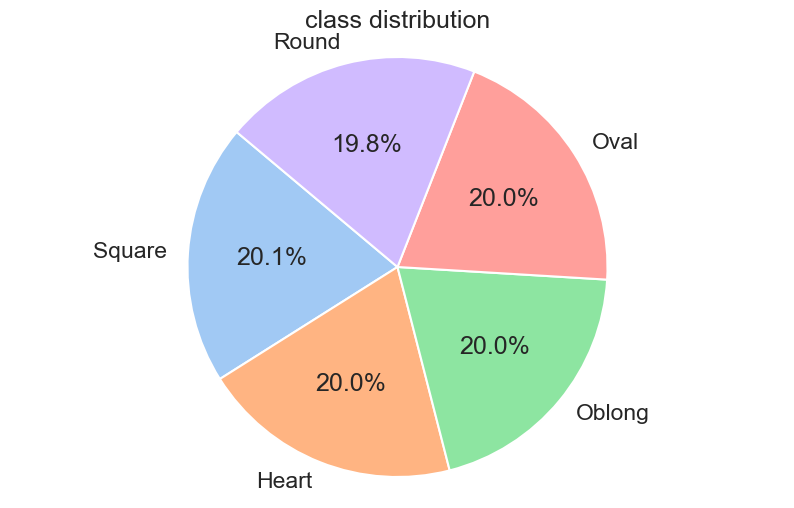

In [25]:
# plotting style
sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (10, 6)

#visualization overall class distribution
# create pie chart
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal') # drown pie as a circle
plt.title('class distribution')
plt.show()

In [29]:
#add column indicating split for analysis later
train_df = train_df.copy()
test_df = test_df.copy()
val_df = val_df.copy()
train_df['split'] = 'Train'
test_df['split'] = 'Test'
val_df['split'] = 'Validation'

#combined splits into one df for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print('\nsamples per split: ')
print(combined_df['split'].value_counts())


samples per split: 
split
Train         3485
Validation     996
Test           498
Name: count, dtype: int64


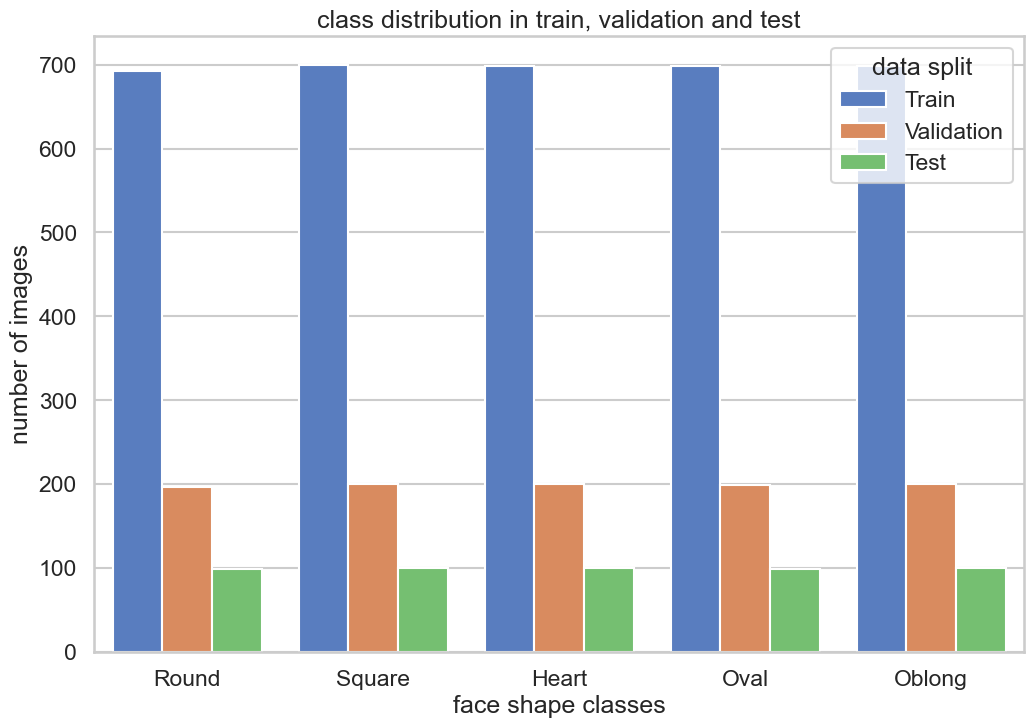

In [30]:
#visualize distribution per split
#countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette='muted')
plt.title('class distribution in train, validation and test')
plt.xlabel('face shape classes')
plt.ylabel('number of images')
plt.legend(title='data split')
plt.show()

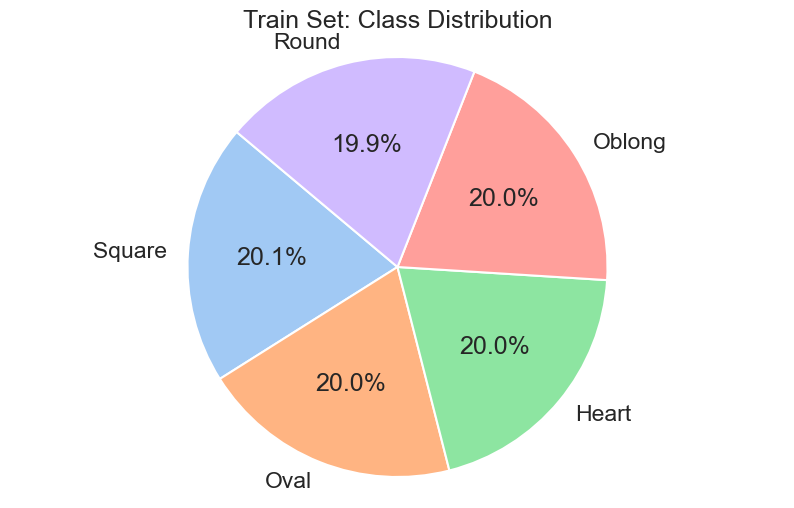

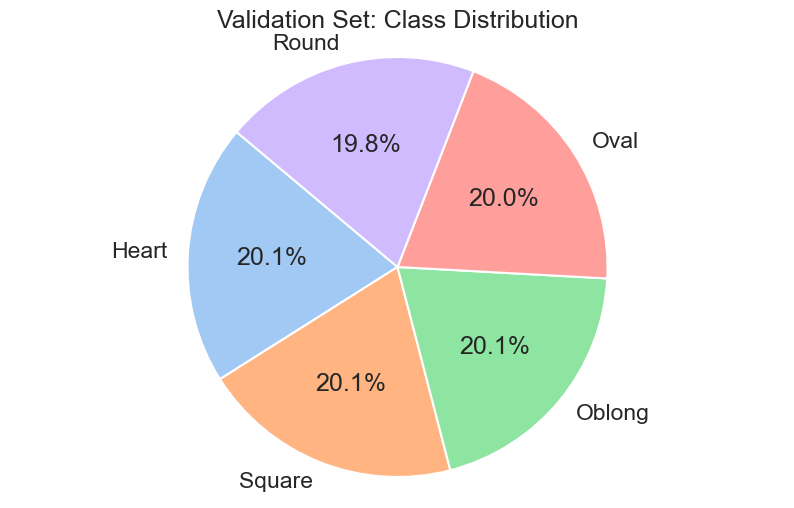

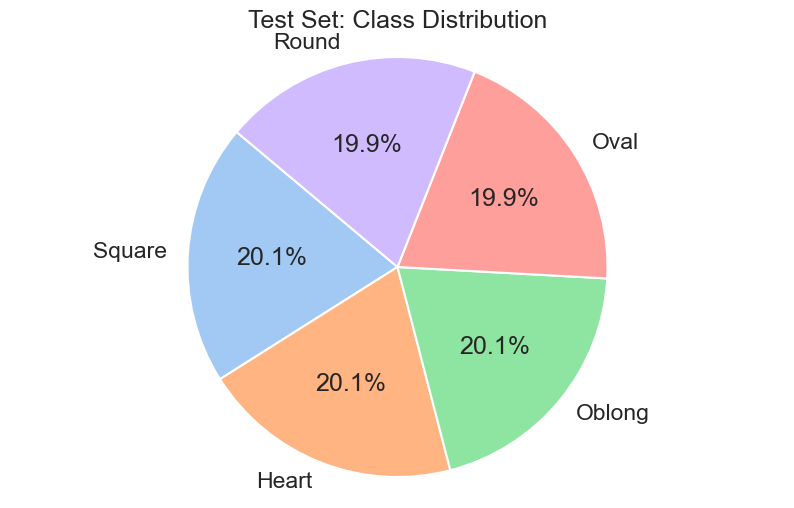

In [34]:
#chart per split for detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()

In [35]:
# display sample images
def display_img(img_paths, title, cols=5):
    rows = (len(img_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(img_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis('off')
        except Exception as e:
            print(f'error loading image {path}: {e}')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
        

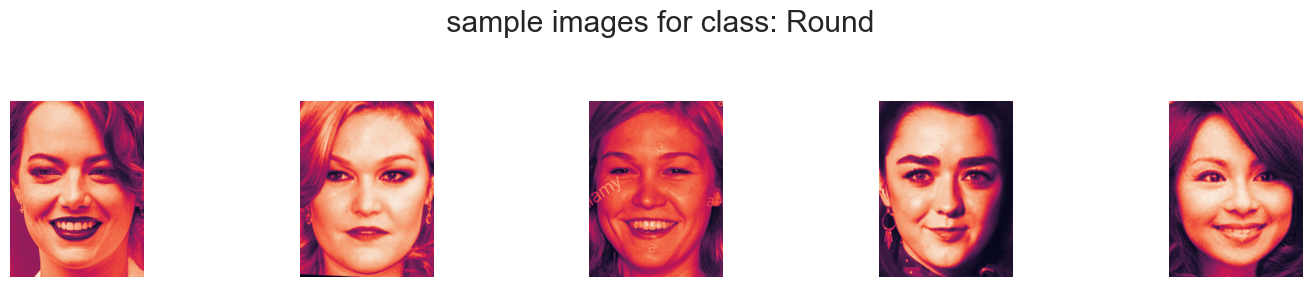

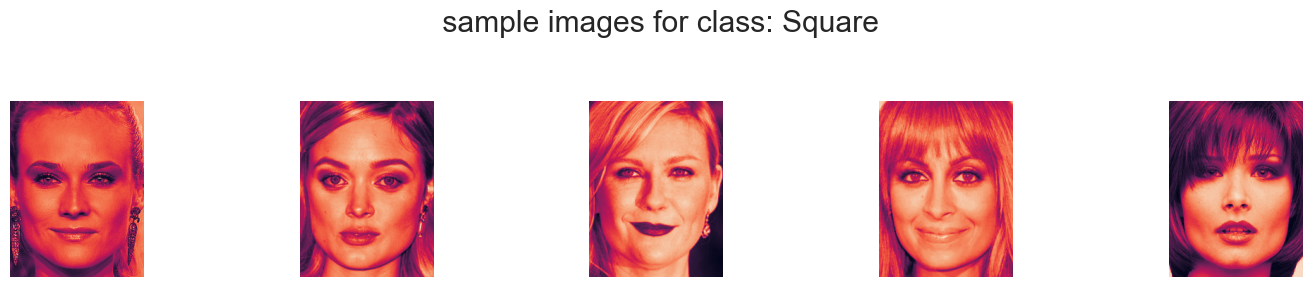

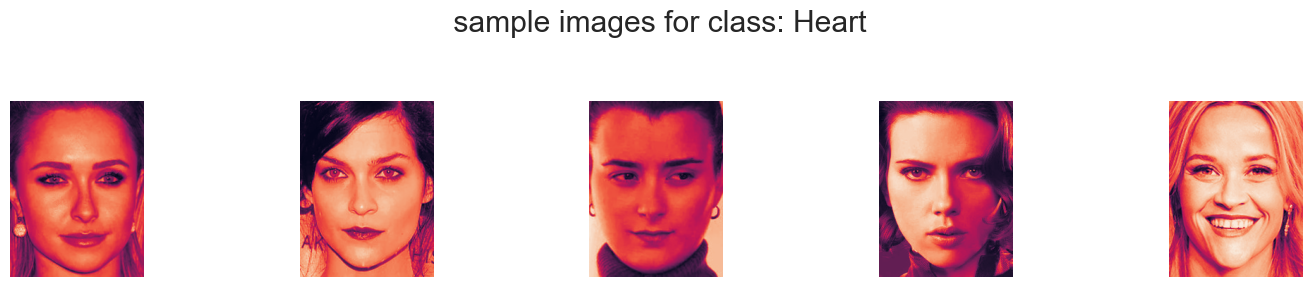

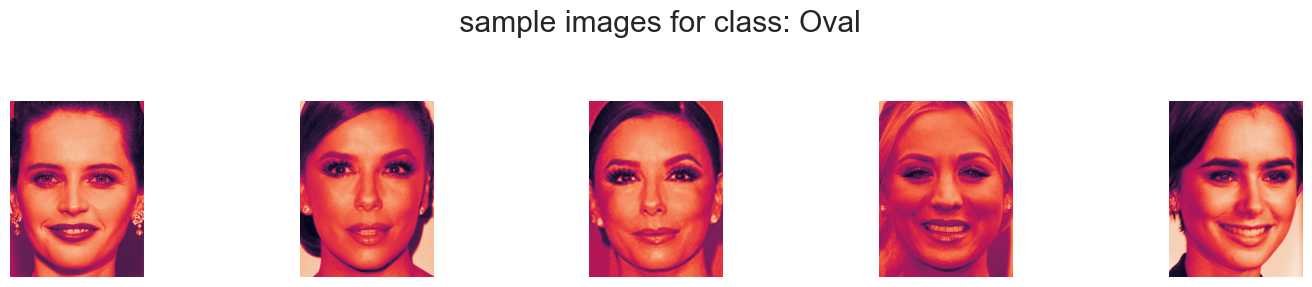

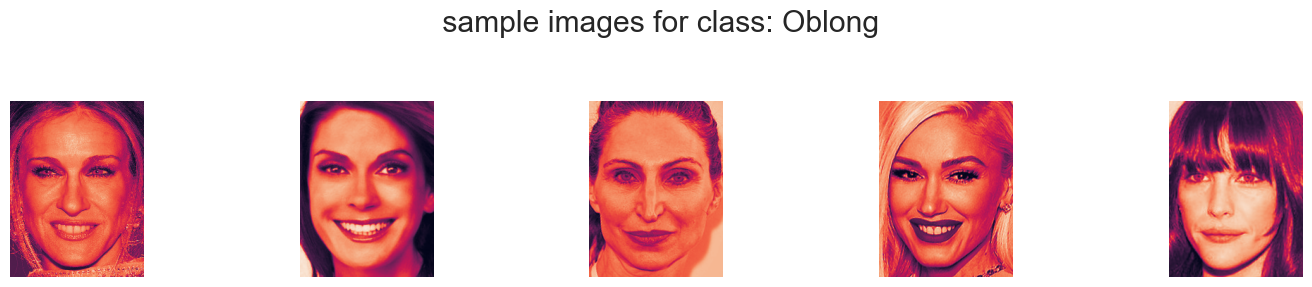

In [38]:
# from each class of train, select 5 random sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_img(sample_paths, title=f' sample images for class: {cls}')